# Chest X-Ray Images (Pneumonia)

KAGGLE DATASET https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

Context
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5


Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.
http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Acknowledgements
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

License: CC BY 4.0

Citation: http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5

# INDEX

#### 1.- LOADING LIBRARIES

####  2.- LOADING THE IMAGES

#### 3.- IMAGE DATA GENERATOR (DATA AUGMENTATION)

#### 4.- DISPLAYING IMAGES

#### 5.- CONVOLUTIONAL NEURAL NETWORK

#### 6.- RESULTS AND PERFORMANCE


## 1.- LOADING LIBRARIES

In [3]:
import numpy as np 
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import activations
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers

Using TensorFlow backend.


##  2.- LOADING THE IMAGES

In [4]:
mainpath = r"C:\Users\dataset\chest_xray"

In [5]:
train_p = r"C:\Users\dataset\chest_xray\train"
test_p = r"C:\Users\dataset\chest_xray\test"
val_p = r"C:\Users\dataset\chest_xray\val"
train_normal = os.path.join(train_p, "NORMAL/")
train_pneu = os.path.join(train_p, "PNEUMONIA/")
test_normal = os.path.join(test_p, "NORMAL/")
test_pneu = os.path.join(test_p, "PNEUMONIA/")
val_normal = os.path.join(val_p, "NORMAL/")
val_pneu = os.path.join(val_p, "PNEUMONIA/")

In [6]:
train_normal_img = glob.glob(train_normal + '*jpeg')
train_pneu_img = glob.glob(train_pneu + '*jpeg')
test_normal_img = glob.glob(test_normal + '*jpeg')
test_pneu_img = glob.glob(test_pneu + '*jpeg')
val_normal_img = glob.glob(val_normal + '*jpeg')
val_pneu_img = glob.glob(val_pneu + '*jpeg')

print(f" Train NORMAL: {len(train_normal_img)}\n Train PNEUMONIA: {len(train_pneu_img)}\n Test NORMAL: {len(test_normal_img)}\n Test PNEUMONIA: {len(test_pneu_img)}\n Val NORMAL: {len(val_normal_img)}\n Val PNEUMONIA:{len(val_pneu_img)}")

 Train NORMAL: 1341
 Train PNEUMONIA: 3875
 Test NORMAL: 234
 Test PNEUMONIA: 390
 Val NORMAL: 8
 Val PNEUMONIA:8


Distribution for Pneumonia / Normal labels training, test and validation images

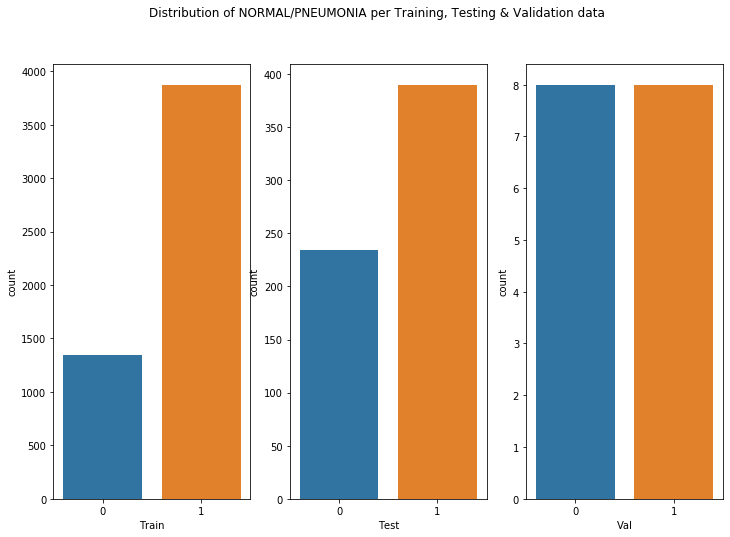

In [13]:
train = []
test = []
val = []

for i in train_normal_img:
    train.append([i, 0])

for i in train_pneu_img:
    train.append([i, 1])

for i in test_normal_img:
    test.append([i, 0])

for i in test_pneu_img:
    test.append([i, 1])
    
for i in val_normal_img:
    val.append([i, 0])

for i in val_pneu_img:
    val.append([i, 1])
   
df_train = pd.DataFrame(train, columns=["img", "label"])
df_test = pd.DataFrame(test, columns=["img", "label"])
df_val = pd.DataFrame(val, columns=["img", "label"])

dfs = [df_train, df_test, df_val]
dfs1 = ["Train", "Test", "Val"]

fig, ax = plt.subplots(1,3, figsize=(12,8))
for i in range(len(dfs)):
    plt.subplot(1,3, i+1)
    sns.countplot(dfs[i]["label"])
    plt.xlabel(dfs1[i])
plt.suptitle("Distribution of NORMAL/PNEUMONIA per Training, Testing & Validation data")
plt.show()

Img_size = 224  is the default value for height and width which usually is the size these kind of models were trained with and seems to be right for making the learning.

The images are normalized // 255 because the original ones consist of RGB coefficients in the range [0-255]

In [8]:
IMG_SIZE = 224


X_tr_n = []
y_tr_n = []


for i in train_normal_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(0, num_classes=2)
    X_tr_n.append(img)
    y_tr_n.append(label)
    
X_tr_n = np.array(X_tr_n)
y_tr_n = np.array(y_tr_n)
print(f"Shape Training normal : {X_tr_n.shape}")
print(f"Shape Label for training normal: {y_tr_n.shape}")

'+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'


X_tr_pn = []
y_tr_pn = []


for i in train_pneu_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(1, num_classes=2)
    X_tr_pn.append(img)
    y_tr_pn.append(label)
    
X_tr_pn = np.array(X_tr_pn)
y_tr_pn = np.array(y_tr_pn)
print(f"Shape Training Pneumonia : {X_tr_pn.shape}")
print(f"Shape Label for training Pneumonia: {y_tr_pn.shape}")

'++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'


X_ts_n = []
y_ts_n = []


for i in test_normal_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(0, num_classes=2)
    X_ts_n.append(img)
    y_ts_n.append(label)
    
X_ts_n = np.array(X_ts_n)
y_ts_n = np.array(y_ts_n)
print(f"Shape Test normal : {X_ts_n.shape}")
print(f"Shape Label for test normal: {y_ts_n.shape}")


'+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'


X_ts_pn = []
y_ts_pn = []


for i in test_pneu_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(1, num_classes=2)
    X_ts_pn.append(img)
    y_ts_pn.append(label)
    
X_ts_pn = np.array(X_ts_pn)
y_ts_pn = np.array(y_ts_pn)
print(f"Shape Test Pneumonia : {X_ts_pn.shape}")
print(f"Shape Label for test Pneumonia: {y_ts_pn.shape}")

'++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'


X_val_n = []
y_val_n = []


for i in val_normal_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(0, num_classes=2)
    X_val_n.append(img)
    y_val_n.append(label)
    
X_val_n = np.array(X_val_n)
y_val_n = np.array(y_val_n)
print(f"Shape Valid normal : {X_val_n.shape}")
print(f"Shape Label for valid normal: {y_val_n.shape}")

'+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++'

X_val_pn = []
y_val_pn = []


for i in val_pneu_img:
    img = cv2.imread(str(i))
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    img = img.astype(np.float32)/255
    label = to_categorical(1, num_classes=2)
    X_val_pn.append(img)
    y_val_pn.append(label)
    
X_val_pn = np.array(X_val_pn)
y_val_pn = np.array(y_val_pn)
print(f"Shape Valid Pneumonia : {X_val_pn.shape}")
print(f"Shape Label for valid Pneumonia: {y_val_pn.shape}")


# for i in train_pneu_img:
#     train.append([i, 1])

# for i in test_normal_img:
#     test.append([i, 0])

# for i in test_pneu_img:
#     test.append([i, 1])
    
# for i in val_normal_img:
#     val.append([i, 0])

# for i in val_pneu_img:
#     val.append([i, 1])

Shape Training normal : (1341, 224, 224, 3)
Shape Label for training normal: (1341, 2)
Shape Training Pneumonia : (3875, 224, 224, 3)
Shape Label for training Pneumonia: (3875, 2)
Shape Test normal : (234, 224, 224, 3)
Shape Label for test normal: (234, 2)
Shape Test Pneumonia : (390, 224, 224, 3)
Shape Label for test Pneumonia: (390, 2)
Shape Valid normal : (8, 224, 224, 3)
Shape Label for valid normal: (8, 2)
Shape Valid Pneumonia : (8, 224, 224, 3)
Shape Label for valid Pneumonia: (8, 2)


In [92]:
print(f" % Label NORMAL in Training data: {round((len(df_train[df_train['label']==0]))/(len(df_train)),4)}")
print(f" % Label PNEUMONIA in Training data: {round((len(df_train[df_train['label']==1]))/len(df_train),4)}")
print(f" % Label NORMAL in Test data: {round((len(df_test[df_test['label']==0]))/(len(df_test)),4)}")
print(f" % Label PNEUMONIA in Test data: {round((len(df_test[df_test['label']==1]))/len(df_test),4)}")

 % Label NORMAL in Training data: 0.2571
 % Label PNEUMONIA in Training data: 0.7429
 % Label NORMAL in Test data: 0.375
 % Label PNEUMONIA in Test data: 0.625


'os.walk' allows us to get the root, directories and files for our mainpath

In [93]:
for dire, _, file in os.walk(mainpath):
    for filename in file:
        print(os.path.join(dire, filename))

C:\Users\dataset\chest_xray\chest_xray\.DS_Store
C:\Users\dataset\chest_xray\chest_xray\test\.DS_Store
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0011-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0013-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0015-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\IM-0016-

C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0218-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0219-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0220-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0221-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0222-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0223-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0224-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0225-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0226-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0227-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0228-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0229-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0230-0001.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\NORMAL\IM-0231-0001.jpeg
C:\Users\dataset\che

C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\.DS_Store
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1005_virus_1688.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person1006_bacteria_2937.jpeg
C:\Users\dat

C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person382_bacteria_1740.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person382_bacteria_1741.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person382_bacteria_1742.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person382_bacteria_1745.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person382_bacteria_1746.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1747.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1748.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1749.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1750.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1751.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_1752.jpeg
C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA\person383_bacteria_17

C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_475.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_477.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_478.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_479.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_480.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_481.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person100_bacteria_482.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person101_bacteria_483.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person101_bacteria_484.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person101_bacteria_485.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person101_bacteria_486.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person102_bacteria_487.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person103_bacteria_488.jpeg
C:\Users\dataset\chest_xray\test\PNEUMONIA\person103_bacteria_489.jpeg
C:\Use

C:\Users\dataset\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1005_virus_1688.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1006_bacteria_2937.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1007_bacteria_2938.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person1007_virus_1690.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person100

C:\Users\dataset\chest_xray\train\PNEUMONIA\person420_bacteria_1847.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person420_bacteria_1848.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person420_bacteria_1849.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person420_bacteria_1850.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person420_bacteria_1851.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person421_bacteria_1852.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person421_virus_866.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person422_bacteria_1853.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person422_virus_867.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person422_virus_868.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person423_bacteria_1854.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person423_bacteria_1855.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person423_bacteria_1856.jpeg
C:\Users\dataset\chest_xray\train\PNEUMONIA\person423_bacteria_

C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\._PNEUMONIA
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0001-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0003-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0005-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0006-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0007-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0009-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0010-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0011-0001-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0011-0001-0002.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0011-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\test\NORMAL\._IM-0013-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xr

C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._.DS_Store
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0115-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0117-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0119-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0122-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0125-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0127-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0128-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0129-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0131-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0133-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\NORMAL\._IM-0135-0001.jpeg
C:\Users\dataset\chest_xray\__MACOSX

C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._.DS_Store
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_bacteria_2931.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_virus_1681.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1001_bacteria_2932.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1002_bacteria_2933.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_bacteria_2934.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_virus_1685.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_bacteria_2935.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_virus_1686.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1005_bacteria_2936.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._per

C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person450_virus_931.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person451_bacteria_1942.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person451_virus_932.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person452_bacteria_1943.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person453_virus_935.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person453_virus_936.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person454_bacteria_1945.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person454_virus_938.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person455_bacteria_1947.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person456_bacteria_1948.jpeg
C:\Users\dataset\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._pers

## 3.- IMAGE DATA GENERATOR (DATA AUGMENTATION)

By using Image data Generator we are able to "make" more images by applying to the existing ones a number of transformations:

In our dataset for detecting Pneumonia, our CNN will work with the provided images but also with a rotation of 20 degrees, zooming, flipping it horizontally, stretching the image to a certain angle (shear_range) and also new pixels will be generated by the 'nearest' method.

It is worth noting the need to rescale them as the RGB coefficients are in the range 0-255 and our models usually works much better if the data values move from 0 to 1

We will be using 'flow_from_directory' to get all the images from train, test and val directories. This method is able to know the labels by recognising the subdirectories (in our case, 'normal' and 'pneumonia' subdirs).

In [15]:
train_dir=r"C:\Users\dataset\chest_xray\chest_xray\train"
test_dir=r"C:\Users\dataset\chest_xray\chest_xray\test"
validation_dir=r"C:\Users\dataset\chest_xray\chest_xray\val"

IMG_SHAPE = 224
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(  
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 15,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(  
    train_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='binary')


test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(  
    validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='binary')


img_gen = ImageDataGenerator(  
    rescale=1. / 255)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [95]:
x, y = train_generator.next()
print(y)
print(len(y))
val, counts = np.unique(y, return_counts=True)
print(val, counts)

x, y = train_generator.next()
print(y)
print(len(y))
val, counts = np.unique(y, return_counts=True)
print(val, counts)

x, y = train_generator.next()
print(y)
print(len(y))
val, counts = np.unique(y, return_counts=True)
print(val, counts)

[0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1.]
32
[0. 1.] [10 22]
[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1.]
32
[0. 1.] [ 8 24]
[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0.]
32
[0. 1.] [ 8 24]


Just to clarify myself about looking into labels after applying Image Data Generator. We set BATCH_SIZE = 32 and according to previous steps  % Label NORMAL in Training data: 0.25 & % Label PNEUMONIA in Training data: 0.75. It seems the proportion of the labels get above is not too far from this.

In [96]:
train_dir=r"C:\Users\dataset\chest_xray\chest_xray\train"

img_flow_train= img_gen.flow_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary' )

Found 5216 images belonging to 2 classes.


In [16]:
test_dir=r"C:\Users\dataset\chest_xray\chest_xray\test"

img_flow_test = test_datagen.flow_from_directory(test_dir, shuffle=True, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary' )

Found 624 images belonging to 2 classes.


In [17]:
validation_dir=r"C:\Users\dataset\chest_xray\chest_xray\val"
img_flow_val=test_datagen.flow_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, target_size=(IMG_SHAPE, IMG_SHAPE),class_mode='binary')

Found 16 images belonging to 2 classes.


In [99]:
images, labels = next(img_flow_train)
print(f"For Training images [batch size, img_shape, img_shape, channels] : {images.shape}, Labels: {labels.shape}")

images, labels = next(img_flow_val)
print(f"For validation images [# images, img_shape, img_shape, channels] : {images.shape}, Labels: {labels.shape}")


For Training images [batch size, img_shape, img_shape, channels] : (32, 224, 224, 3), Labels: (32,)
For validation images [# images, img_shape, img_shape, channels] : (16, 224, 224, 3), Labels: (16,)


In [100]:
train_norm = os.listdir(r"C:\Users\dataset\chest_xray\chest_xray\train\NORMAL")
train_pneu = os.listdir(r"C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA")

print(f"Length for normal labelled images: {len(train_norm)} + length for pneumonia labelled images: {len(train_pneu)}")

Length for normal labelled images: 1342 + length for pneumonia labelled images: 3876


## 4.- DISPLAYING RANDOM IMAGES (NORMAL/PNEUMONIA)

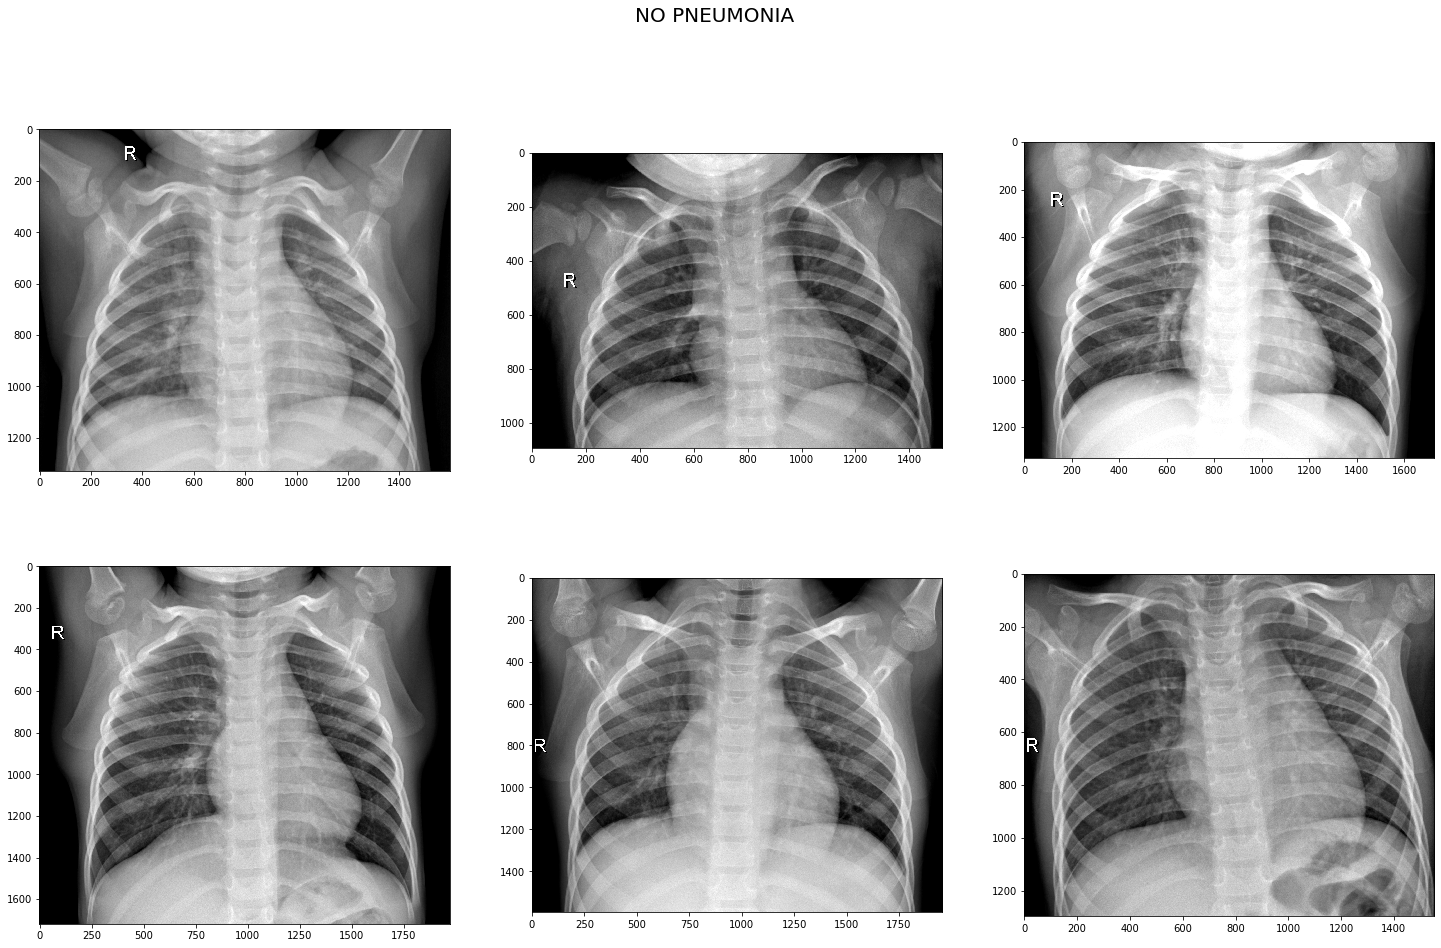

In [101]:
r_n = np.random.choice(train_norm, 6)
plt.subplots(2,3, figsize=(25,15))

k=0

for i in r_n:
    k+=1
    plt.subplot(2,3,k)
    a = cv2.imread(r"C:\Users\dataset\chest_xray\chest_xray\train\NORMAL"+ "/"+ i)
    plt.imshow(a)
plt.suptitle("NO PNEUMONIA", fontsize=20)
plt.show()

'cv2.imread' is interesting because it returns a matrix with Red [:,:,0], Green [:,:,1] and Blue [:,:,2] channels which should be flatten to convert them to a vector.

In [102]:
a = cv2.imread(r"C:\Users\dataset\chest_xray\chest_xray\test\NORMAL\NORMAL2-IM-0289-0001.jpeg")
print(f"Image Dimensions  - height: {a.shape[0]}, width: {a.shape[1]} and number of channels: {a.shape[2]}")


Image Dimensions  - height: 1597, width: 1894 and number of channels: 3


Showing the images  + distplot for the pixels intensities

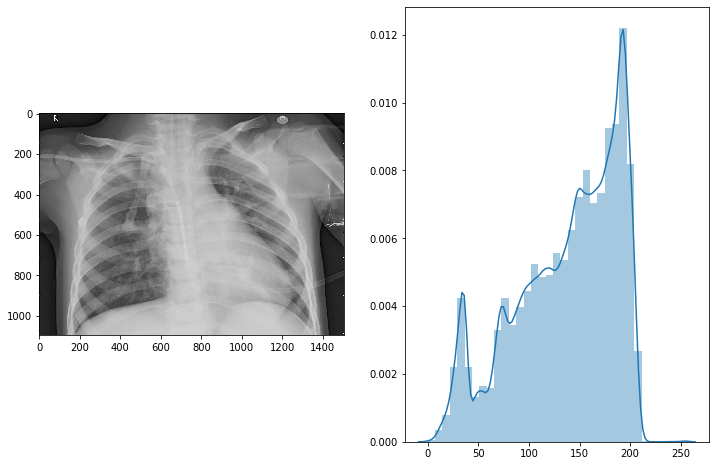

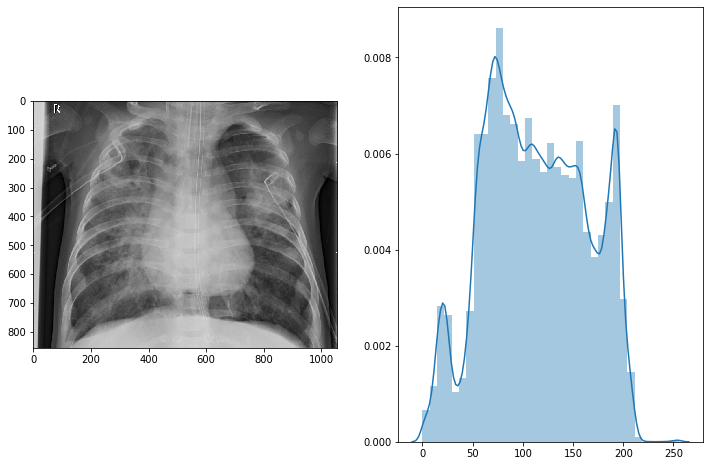

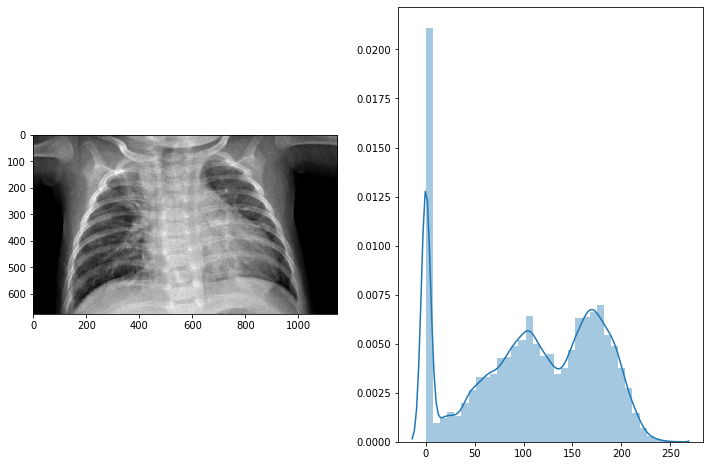

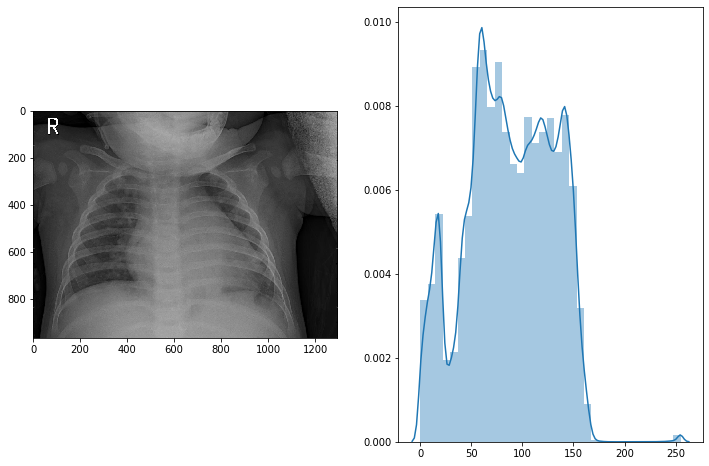

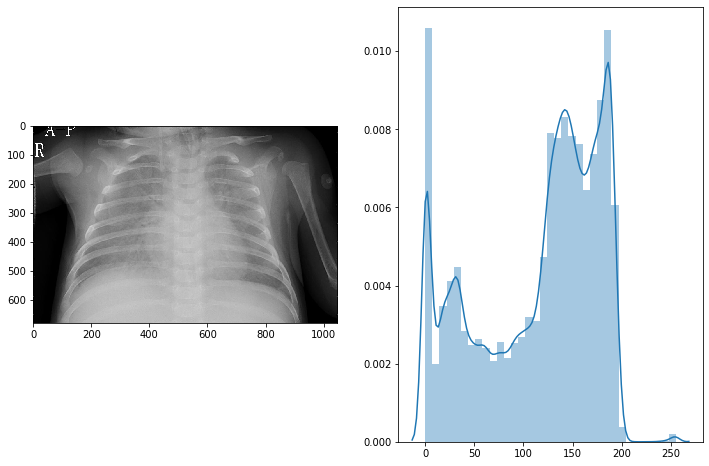

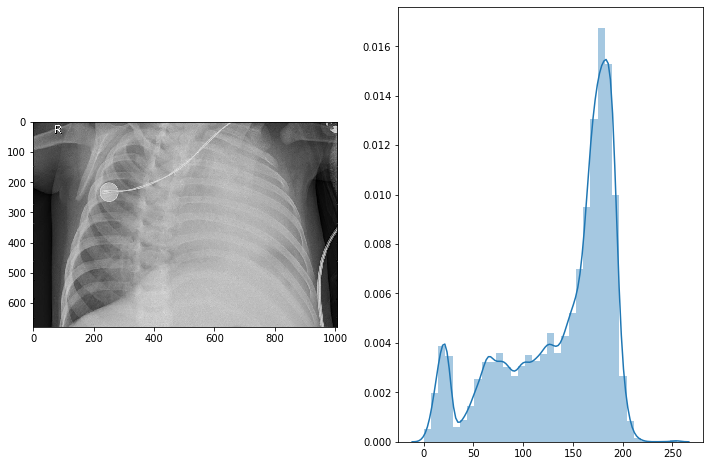

In [103]:
def plo_img(img):
    plt.subplots(1,2, figsize=(12,8))
    plt.subplot(121)
    b = cv2.imread(r"C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA"+ "/"+ img)
    plt.imshow(b)
    plt.subplot(122)
    sns.distplot(b[:,:,0].flatten(), bins=35)
plt.show()

r_n = np.random.choice(train_pneu, 6)

for i in r_n:
    plo_img(i)

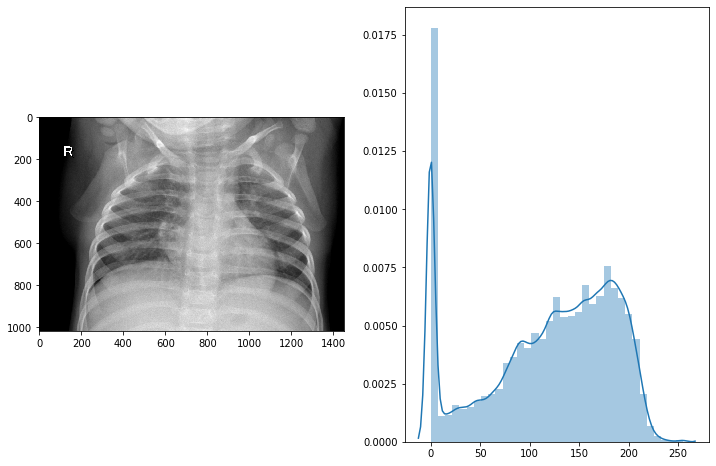

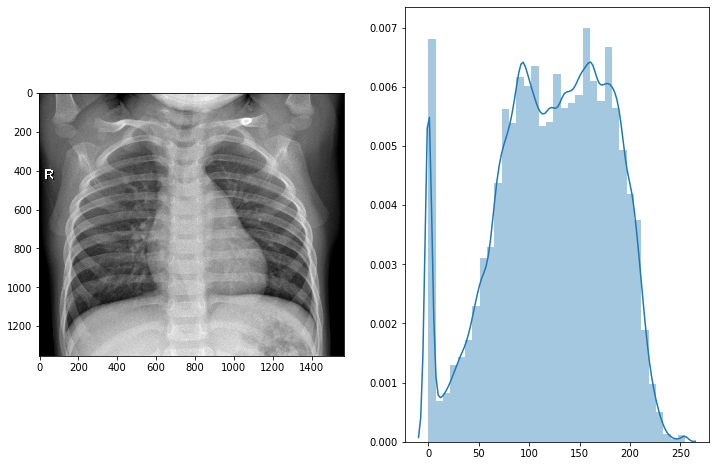

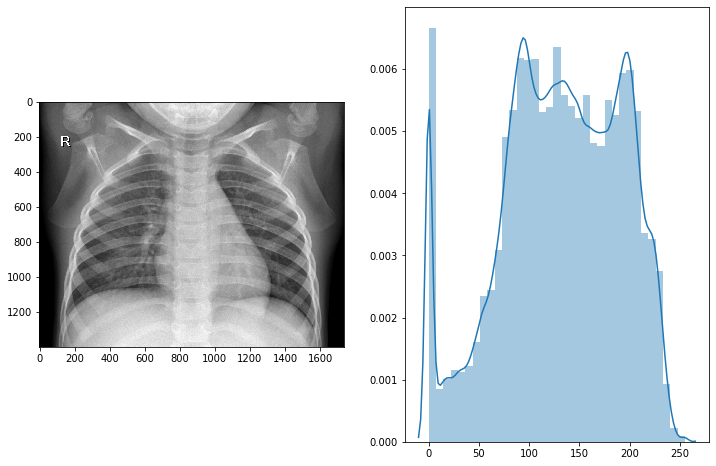

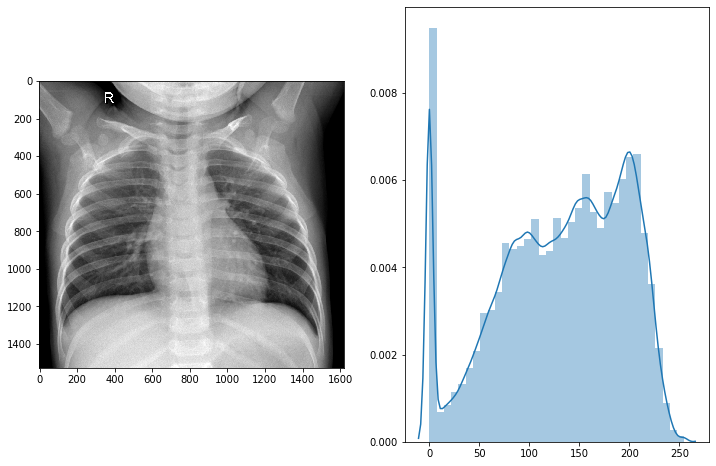

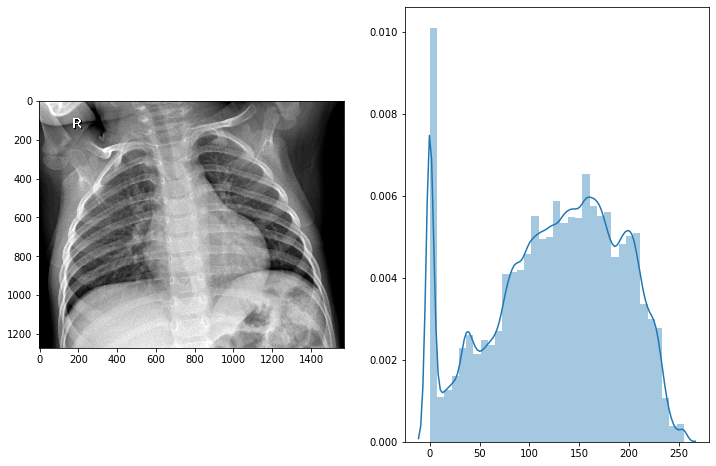

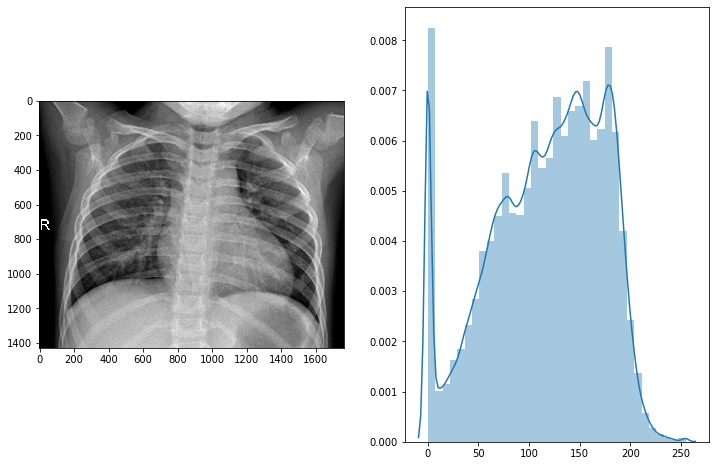

In [104]:
def plo_img(img):
    plt.subplots(1,2, figsize=(12,8))
    plt.subplot(121)
    b = cv2.imread(r"C:\Users\dataset\chest_xray\chest_xray\train\NORMAL"+ "/"+ img)
    plt.imshow(b)
    plt.subplot(122)
    sns.distplot(b[:,:,0].flatten(), bins=35)
plt.show()

r_n2 = np.random.choice(train_norm, 6)

for i in r_n2:
    plo_img(i)

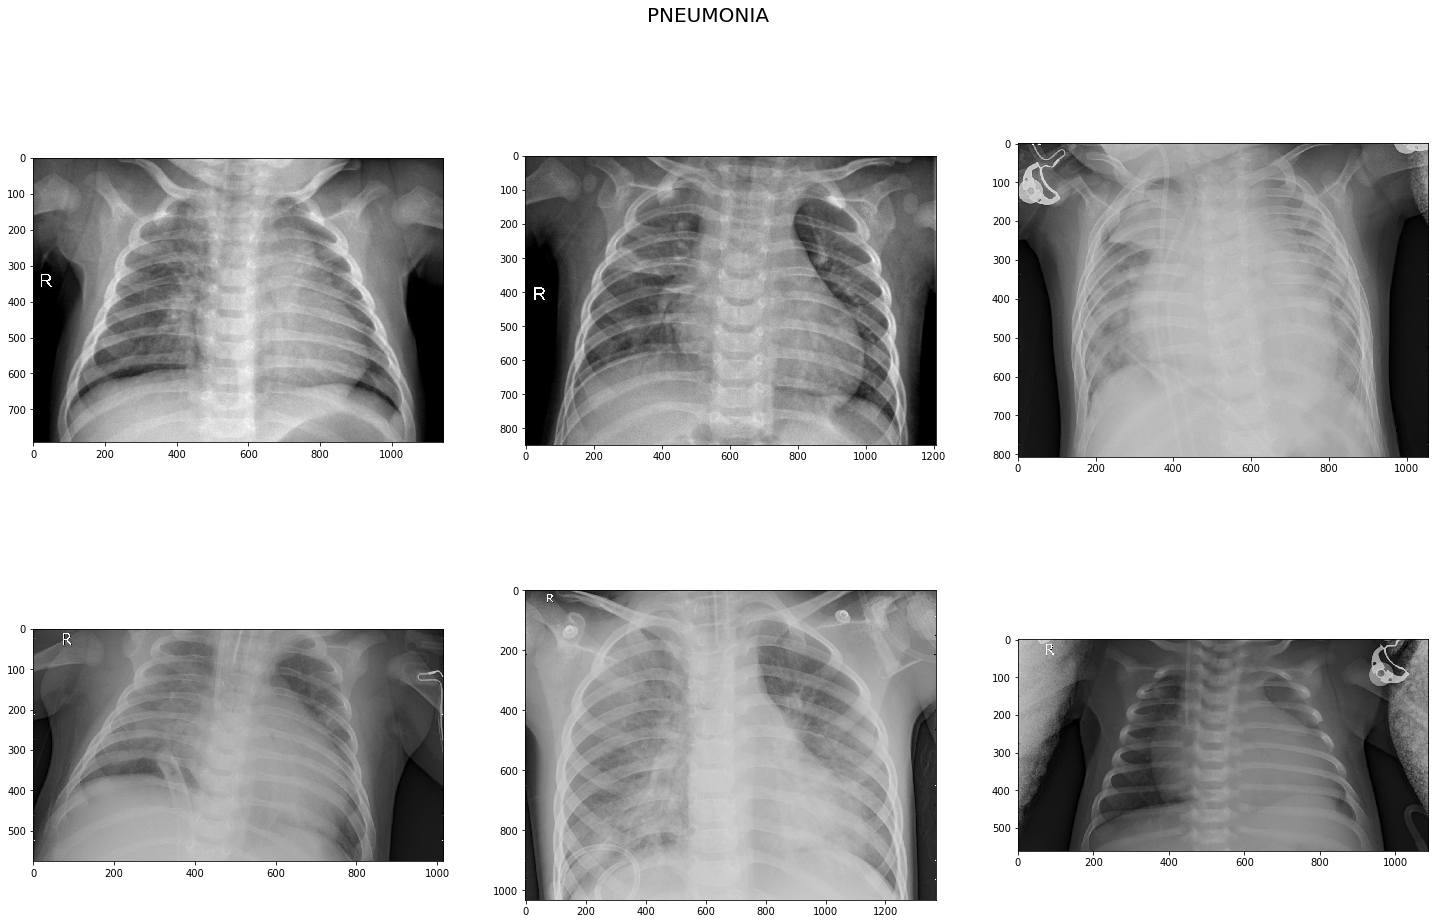

In [106]:
r_n = np.random.choice(train_pneu, 6)
plt.subplots(2,3, figsize=(25,15))

k=0

for i in r_n:
    k+=1
    plt.subplot(2,3,k)
    b = cv2.imread(r"C:\Users\dataset\chest_xray\chest_xray\train\PNEUMONIA"+ "/"+ i)
    plt.imshow(b)
plt.suptitle("PNEUMONIA", fontsize=20)
plt.show()

## 5.- CONVOLUTIONAL NEURAL NETWORK


'Filters' = As this dataset is not really complex  we can set the common initial ('small') value as 32 which complexity will be increasing along the posterior layers in order to be able to capture further abstractions.

'Kernel_size' = It refers to width x height of the above filters and will inspect a window of 3 X 3 pixels. This kernel_size is widely used mainly when images are not big.

'Padding' = This value is set "same" (not the default one) because it seems to work better if output size equals input size. If dimensions are equal we do not have to worry about it thru dimensions. Additionally the info in the borders is kept.

'Input_shape' = [batch, rows, columns, filters]. Taken 224×224x3 which are the input image dimensions that VGG16 was originally trained on.

'Strides' = We kept the default value of (1,1) which means the convolutional filter is going thru all the pixels.

The 'activation function' is key component in the network that decides to fire or not a neuron to pass the output to next layers. We will be working with one of the most commom one ('ReLu') in hidden layers in CNN which does not need much time to compute due to not using exponential functions. One key point is this activation function prevents from vanishing gradient problem where the updates of weights do not change and therefore there is no learning,  being able to backpropagate (with the exception of inputs 0 or negative).
Activation function in the outputlayer = 'sigmoid'. Not sure about using 'sigmoid' or 'softmax' but according to the info found, when it comes to a problem for classifying two mutually exclusive ("Pneumonia"/"Normal") seems to yield almost the same results.

'MaxPooling2D' =  After each Conv2D layer the dimensionality of this output should be reduced by calculating the maximum value for each patch of the feature map. Also it seems to be useful for reducing the overfitting. Pool_size = (2, 2 ) takes the maximun value on 2 X 2 pooling window.

For our first model, 'Dropout' will only be applied prior to last dense layer.

#### CNN modelA

The following CNN is a simple one with 4 Conv2D layers followed by their corresponding MaxPooling, without 'Batch Normalization' and only one Dropout (0.5) prior to the last Dense layer. 

On the other hand, it is not clear for me according to the studies I read, if it is recommended to use Batch Normalization and Dropout together in the same network. See: Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift by Xiang Li 1 Shuo Chen 1 Xiaolin Hu 2 Jian Yang 1]

In [107]:

def create_modelA():

    model = Sequential()

    model.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 32, kernel_size= (3, 3), activation='relu', padding='same'))
# #     model.add(Dropout(0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
  
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
#     model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [108]:
modelA = create_modelA()
print(modelA.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)       

'ReduceLROnPlateau' class is needed because we are going to check or monitor if 'val_accuracy' is improving. If not, and for that purpose, I set 2 epochs 'patience' by a factor of 0.5*'learning rate' with a minimun bound for learning rate of 0.0001 

In [109]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)
callback = [learning_rate_reduction]


epochs = 10  

batch_size = 32  

model_historyA = modelA.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, callbacks = callback)

Epoch 1/10
163/163 [==============================] - 127s 779ms/step - loss: 0.3803 - accuracy: 0.8311 - val_loss: 0.5122 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 109s 667ms/step - loss: 0.2620 - accuracy: 0.8921 - val_loss: 0.6827 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 111s 680ms/step - loss: 0.2319 - accuracy: 0.9001 - val_loss: 0.8014 - val_accuracy: 0.7500

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
163/163 [==============================] - 110s 674ms/step - loss: 0.1915 - accuracy: 0.9277 - val_loss: 1.3094 - val_accuracy: 0.5625
Epoch 5/10
163/163 [==============================] - 108s 661ms/step - loss: 0.1739 - accuracy: 0.9329 - val_loss: 0.8879 - val_accuracy: 0.6875

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/10
163/163 [==============================] - 111s 678ms/step - loss: 0.1503 - accuracy: 0.9452 - va

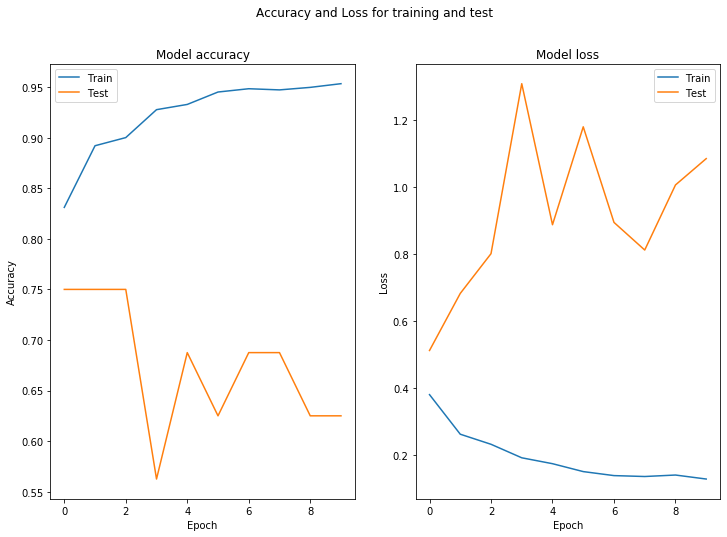

In [111]:
fig, ax = plt.subplots(1,2, figsize=(12,8))


plt.suptitle("Accuracy and Loss for training and test")


ax[0].plot(model_historyA.history['accuracy'])
ax[0].plot(model_historyA.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'])



ax[1].plot(model_historyA.history['loss'])
ax[1].plot(model_historyA.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'])



#### CNN modelB

In the following CNN we are going to see if adding a layer of BatchNormalization yields better results. In this case, we add a layer for activation instead of incluiding it on Conv2D layer because it seems to be better in practice to apply BN layer right after the activation.

Interesting info about Batch Normalization after or before ReLu:

https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md#bn----before-or-after-relu

The final 'Dropout' layer prior the 'Dense' has been mantained for this model as well.

In [19]:
def create_modelB():

    model = Sequential()

    model.add(Conv2D(filters= 32, kernel_size=(3, 3), input_shape=(224, 224, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 32, kernel_size= (3, 3),  padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [20]:
modelB = create_modelB()
print(modelB.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 32)     

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) 
callback = [learning_rate_reduction]


epochs = 10  

batch_size = 32  

model_historyB = modelB.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, callbacks = callback)

Epoch 1/10
163/163 [==============================] - 123s 756ms/step - loss: 0.4047 - accuracy: 0.8689 - val_loss: 9.2737 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 113s 692ms/step - loss: 0.2280 - accuracy: 0.9143 - val_loss: 13.0712 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 114s 699ms/step - loss: 0.2063 - accuracy: 0.9239 - val_loss: 43.3626 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/10
163/163 [==============================] - 113s 691ms/step - loss: 0.1823 - accuracy: 0.9427 - val_loss: 6.9332 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 111s 683ms/step - loss: 0.1723 - accuracy: 0.9484 - val_loss: 7.0316 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/10
163/163 [==============================] - 111s 682ms/step - loss: 0.1543 - accuracy: 0.9528 - 

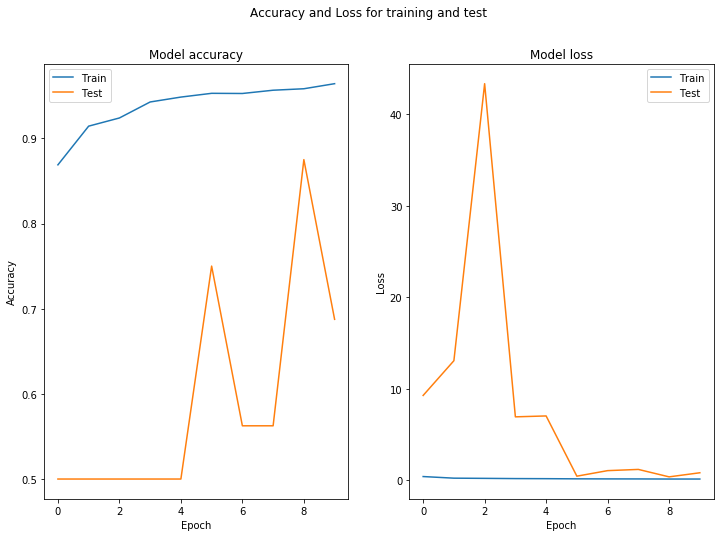

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,8))


plt.suptitle("Accuracy and Loss for training and test")


ax[0].plot(model_historyB.history['accuracy'])
ax[0].plot(model_historyB.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'])



ax[1].plot(model_historyB.history['loss'])
ax[1].plot(model_historyB.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'])


plt.show()

#### CNN modelC

We have added two hidden layers (Conv2D with 128 and 256 filters with their corresponding BN and MaxPooling) to the network. We would like to see better accuracy by extracting more features from the data but the risk of overfitting the dataset by increasing the parameters of the network should be taken into account.

Additionally I have changed the optimizer to 'rmsprop'. 'Adam' shows really good results in general but I have read that it sometimes does not converge to the optimal solution in image classification problems ('struggles on non-convex optimization of neural networks').

In [116]:
def create_modelC():

    model = Sequential()

    model.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 256, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [117]:
modelC = create_modelC()
print(modelC.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 64)       

In [118]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001) 

callback = [learning_rate_reduction]


epochs = 10  
batch_size = 32  

model_historyC = modelC.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, callbacks = callback)

Epoch 1/10
163/163 [==============================] - 112s 685ms/step - loss: 0.8438 - accuracy: 0.8495 - val_loss: 38.9290 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 111s 679ms/step - loss: 0.2965 - accuracy: 0.9020 - val_loss: 34.0847 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 111s 682ms/step - loss: 0.2548 - accuracy: 0.9179 - val_loss: 18.6152 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
Epoch 4/10
163/163 [==============================] - 111s 681ms/step - loss: 0.1573 - accuracy: 0.9540 - val_loss: 14.5815 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 112s 687ms/step - loss: 0.1550 - accuracy: 0.9505 - val_loss: 16.7748 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.
Epoch 6/10
163/163 [==============================] - 111s 682ms/step - loss: 0.1184 - accuracy: 0.965

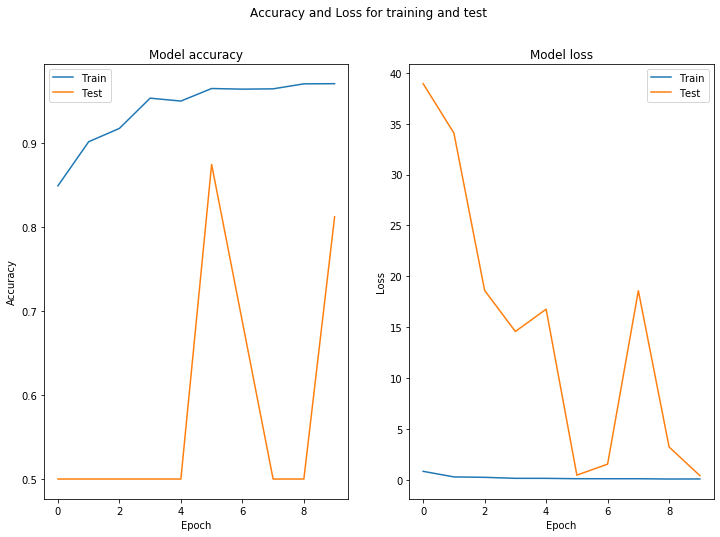

In [119]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
                      

plt.suptitle("Accuracy and Loss for training and test")


ax[0].plot(model_historyC.history['accuracy'])
ax[0].plot(model_historyC.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'])



ax[1].plot(model_historyC.history['loss'])
ax[1].plot(model_historyC.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'])


plt.show()

#### CNN modelD

We have added two hidden layers (Conv2D with 128 and 256 filters with their corresponding BN and MaxPooling) to the network. We would like to see better accuracy by extracting more features from the data but, as pointed out in the previous model, there is a risk of overfitting. 

In [120]:
def create_modelD():

    model = Sequential()

    model.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 256, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.40))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [121]:
modelD = create_modelD()
print(modelD.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 56, 56, 64)       

In [122]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.3, 
                                            min_lr=0.000001) 

callback = [learning_rate_reduction]


epochs = 10  
batch_size = 32  

model_historyD = modelD.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, callbacks = callback)

Epoch 1/10
163/163 [==============================] - 112s 687ms/step - loss: 0.5196 - accuracy: 0.8865 - val_loss: 65.8835 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 111s 681ms/step - loss: 0.1670 - accuracy: 0.9365 - val_loss: 44.9124 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 112s 685ms/step - loss: 0.1655 - accuracy: 0.9354 - val_loss: 25.3137 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/10
163/163 [==============================] - 113s 691ms/step - loss: 0.1342 - accuracy: 0.9526 - val_loss: 0.5642 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 111s 680ms/step - loss: 0.1155 - accuracy: 0.9592 - val_loss: 4.2394 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 111s 683ms/step - loss: 0.0974 - accuracy: 0.9672 - val_loss: 0.3255 - val_accuracy: 0.9375
Epoch 7/10
163/163 [====================

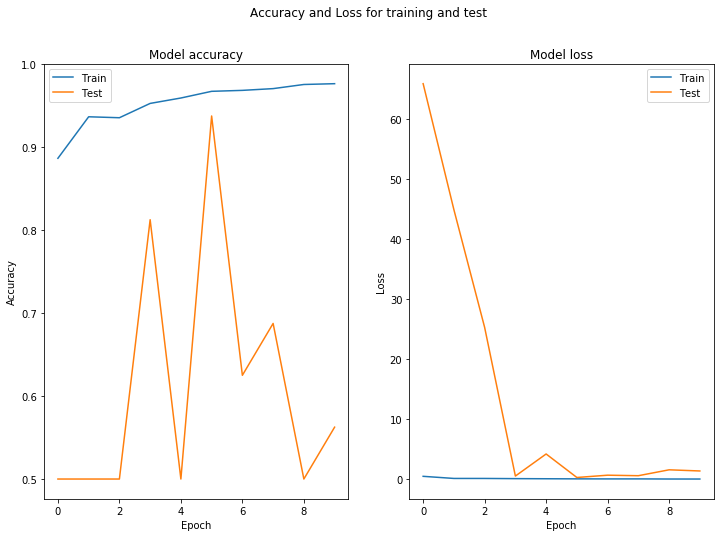

In [123]:
fig, ax = plt.subplots(1,2, figsize=(12,8))


plt.suptitle("Accuracy and Loss for training and test")


ax[0].plot(model_historyD.history['accuracy'])
ax[0].plot(model_historyD.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'])



ax[1].plot(model_historyD.history['loss'])
ax[1].plot(model_historyD.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'])


plt.show()

#### CNN modelE

We have added two hidden layers to the previous model, adding a second one with 128 filters and 256 filters. To try to avoid overfitting, Dropout layers are added (with small values of 0.1 - 0.2) after most of the Conv2D layers.

As pointed out before, not clear for me about the convenience of:
    * Applying BatchNormalization and Dropout in the same network?
    * Applying BatchNormalization after Dropout?

In [12]:
def create_modelE():

    model = Sequential()

    model.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 64, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 128, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 256, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters = 256, kernel_size= (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [13]:
modelE = create_modelE()
print(modelE.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)       

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.000001) 

callback = [learning_rate_reduction]


epochs = 15  
batch_size = 32  

model_historyE = modelE.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator, callbacks = callback)

Epoch 1/15
163/163 [==============================] - 165s 1s/step - loss: 0.2776 - accuracy: 0.8919 - val_loss: 6.3631 - val_accuracy: 0.5000
Epoch 2/15
163/163 [==============================] - 112s 685ms/step - loss: 0.1725 - accuracy: 0.9363 - val_loss: 2.2414 - val_accuracy: 0.5000
Epoch 3/15
163/163 [==============================] - 111s 682ms/step - loss: 0.1513 - accuracy: 0.9442 - val_loss: 4.8250 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
Epoch 4/15
163/163 [==============================] - 111s 681ms/step - loss: 0.1256 - accuracy: 0.9536 - val_loss: 4.5529 - val_accuracy: 0.5000
Epoch 5/15
163/163 [==============================] - 111s 680ms/step - loss: 0.1129 - accuracy: 0.9586 - val_loss: 0.7255 - val_accuracy: 0.6875
Epoch 6/15
163/163 [==============================] - 111s 681ms/step - loss: 0.1143 - accuracy: 0.9615 - val_loss: 3.4491 - val_accuracy: 0.5000
Epoch 7/15
163/163 [==========================

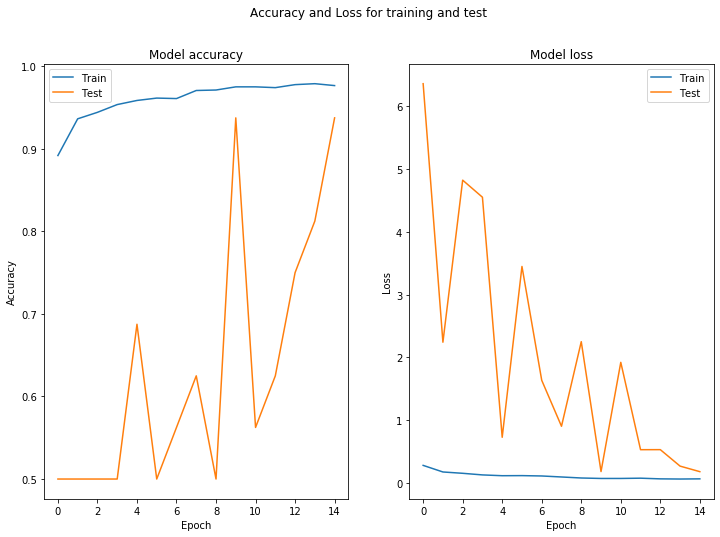

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,8))


plt.suptitle("Accuracy and Loss for training and test")


ax[0].plot(model_historyE.history['accuracy'])
ax[0].plot(model_historyE.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'])



ax[1].plot(model_historyE.history['loss'])
ax[1].plot(model_historyE.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'])


plt.show()

## 6.- RESULTS AND PERFORMANCE

Results and performance for our best model (modelE)

In [19]:
scores = modelE.evaluate_generator(test_set)
print(f"Accuracy of modelE CNN on TEST SET: {modelE.metrics_names[1], scores[1]}")

Accuracy of modelE CNN on TEST SET: ('accuracy', 0.9150640964508057)


In [20]:
modelE.evaluate(test_set)

20/20 [==============================] - 8s 379ms/step


[0.08879758417606354, 0.9150640964508057]

In [77]:
X_ts =  np.concatenate([X_ts_pn, X_ts_n])
y_ts = np.concatenate([y_ts_pn, y_ts_n])

preds = modelE.predict(X_ts)

acc = accuracy_score(y_ts, np.round(preds))*100
cm = confusion_matrix(y_ts, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX++++++++++++++++++++++++')
print(cm)

print('TEST METRICS+++++++++++++++++++++++++++++')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print(f'Accuracy: {acc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {2*precision*recall/(precision+recall)}')

print('TRAIN ACCURACY +++++++++++++++++++++++++++')
print(f'Training acc: {model_historyE.history["accuracy"][-1]*100}')

CONFUSION MATRIX++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[[206  28]
 [ 25 365]]
TEST METRICS+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy: 91.50641025641025
Precision: 92.87531806615776
Recall: 93.58974358974359
F1-score: 93.23116219667943
TRAIN ACCURACY +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Training acc: 97.66104221343994


In [75]:
fpr , tpr , thresholds = roc_curve (y_ts , preds)
auc_mE = auc(fpr, tpr)
print(f"AUC Score: {auc_mE}")

AUC Score: 0.9705018628095551


Thank you for reading ! :-)